In [99]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading the excel dataset into the Jupyter notebook
df= pd.read_excel(r'C:\Users\user\Downloads\HNG\marketing_campaign_dataset.xlsx')

In [6]:
# checking out the dataset
# checking out the first 5 rows
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness


In [7]:
# information about the dataset
# total rows = 200005
# total columns = 15
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  int64  
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.9+ MB


In [8]:
# checking the descriptive statisitics of the data frame
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,12504.441794,5.002416,549.774591,5507.307107,5.494673
std,57736.614632,0.040602,4337.663210,1.734485,260.019354,2596.863794,2.872593
min,1.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,8740.000000,3.500000,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,12497.000000,5.010000,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


In [9]:
# All the column names
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment'],
      dtype='object')

In [10]:
# changing all to column names to lower case
df.columns.str.lower()

Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'duration', 'channel_used', 'conversion_rate', 'acquisition_cost',
       'roi', 'location', 'date', 'clicks', 'impressions', 'engagement_score',
       'customer_segment'],
      dtype='object')

In [11]:
# checking for rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment


In [12]:
# finding the total number of with missing values
# This means there are no missing values in the data set
num_rows_with_missing_values = df[df.isnull().any(axis=1)].sum()
num_rows_with_missing_values

Campaign_ID           0
Company               0
Campaign_Type         0
Target_Audience       0
Duration              0
Channel_Used          0
Conversion_Rate     0.0
Acquisition_Cost      0
ROI                 0.0
Location              0
Date                  0
Clicks                0
Impressions           0
Engagement_Score      0
Customer_Segment      0
dtype: object

In [13]:
# checking for basic statistics (mean, median, standard deviation).
# in these columns:  ROI, Click-Through Rate (CTR), Cost Per Click (CPC), and Conversion Rate
df[['Conversion_Rate', 'Clicks','ROI','Acquisition_Cost']].agg(['mean', 'median', 'std'])

,Conversion_Rate,Clicks,ROI,Acquisition_Cost
mean,0.080069,549.774591,5.002416,12504.441794
median,0.080000,550.000000,5.010000,12497.000000
std,0.040602,260.019354,1.734485,4337.663210


In [14]:
# checking if all the IDS are unique
df['Campaign_ID'].unique()

array([     1,      2,      3, ..., 200003, 200004, 200005], dtype=int64)

In [15]:
# checking for the unique target audience
df['Target_Audience'].unique()

array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
      dtype=object)

In [16]:
# checking for the unique marketing channels
df['Channel_Used'].unique()

array(['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook',
       'Email'], dtype=object)

In [17]:
# checking for outliers 

# calculating Q1 and Q3
Q1= df[['Conversion_Rate', 'Clicks','ROI','Acquisition_Cost']]. quantile(0.25)
Q3=df[['Conversion_Rate', 'Clicks','ROI','Acquisition_Cost']]. quantile (0.75)

# calculating IQR
IQR= Q3 - Q1

# calculating lower and upper bounds
lower_bound= Q1- 1.5 * IQR
upper_bound= Q3 + 1.5 *IQR 


# Create a DataFrame to hold outlier information
outliers = pd.DataFrame()

# Check for outliers in each column
for column in ['Conversion_Rate', 'Clicks', 'ROI', 'Acquisition_Cost']:
    outlier_condition = (df[column] < lower_bound[column]) | (df[column] > upper_bound[column])
    outliers[column] = df[outlier_condition][column]

# Display the outliers
print("Outliers detected in the dataset:")
print(outliers)

Outliers detected in the dataset:
Empty DataFrame
Columns: [Conversion_Rate, Clicks, ROI, Acquisition_Cost]
Index: []


In [61]:
# Comparing campaign success among different channels
Avg_roi_per_campaign_type=df.groupby('Campaign_Type')['ROI'].mean().reset_index()
Avg_roi_per_campaign_type

,Campaign_Type,ROI
0,Display,5.006497
1,Email,4.994274
2,Influencer,5.011040
3,Search,5.008357
4,Social Media,4.991781


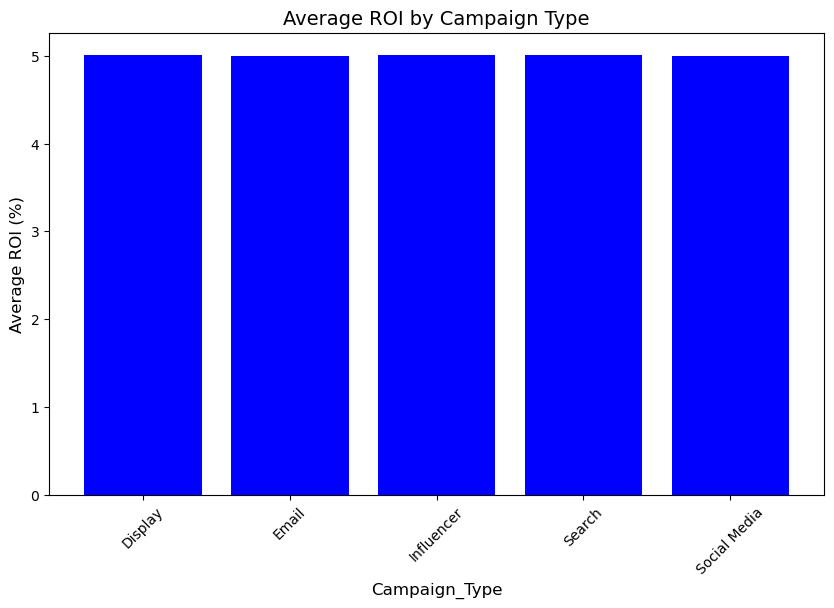

In [63]:
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(Avg_roi_per_campaign_type['Campaign_Type'], Avg_roi_per_campaign_type['ROI'], color='blue')

plt.title('Average ROI by Campaign Type', fontsize=14)
plt.xlabel('Campaign_Type', fontsize=12)
plt.ylabel('Average ROI (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

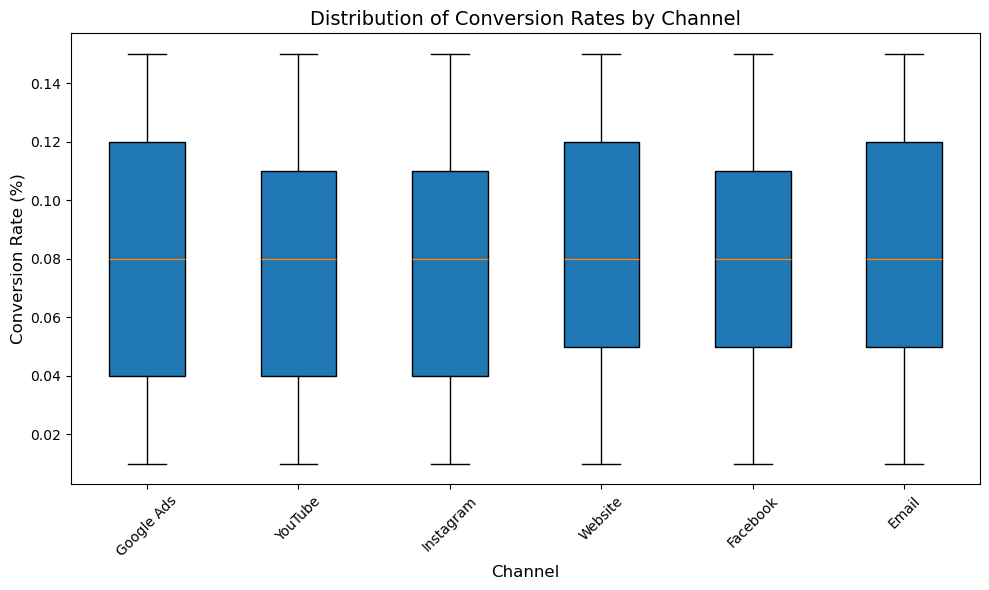

In [49]:
# Comparing campaign success among different channels
# Boxplot (distribution of conversion rates)
plt.figure(figsize=(10, 6))

# Group data by channel
channels = df['Channel_Used'].unique()
data_to_plot = [df[df['Channel_Used'] == channel]['Conversion_Rate'] for channel in channels]

# Create the boxplot
plt.boxplot(data_to_plot, labels=channels, patch_artist=True)

# Customize
plt.title('Distribution of Conversion Rates by Channel', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [124]:
#converting the date column
df['Date'] = pd.to_datetime(df['Date'])
#creating a new column extracting month from the date columnn
df['Month'] = df['Date'].dt.month

In [126]:
# Define month order
#month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
#df = df.sort_values('Month')  # Sort by month

In [128]:
# Pivot the data to create a matrix (Location vs. Month)
pivot_table = df.pivot_table(
    index='Location',
    columns='Month',
    values='ROI',
    aggfunc='mean'  # Use mean, sum, etc., depending on your goal
)

print(pivot_table)

Month              1         2         3         4         5         6   \
Location                                                                  
Chicago      5.003244  5.029822  5.002158  5.057663  4.969126  5.006608   
Houston      5.053001  5.011477  5.003168  4.995567  5.007462  4.976992   
Los Angeles  5.053562  5.035795  4.969784  4.985654  5.032001  5.045538   
Miami        5.020341  5.038994  5.032944  4.983225  4.979425  5.026264   
New York     4.981786  4.972897  5.004085  4.968962  5.004004  4.974811   

Month              7         8         9         10        11        12  
Location                                                                 
Chicago      4.989621  5.007647  5.032198  4.951770  4.984379  4.987855  
Houston      4.995830  4.959693  5.001248  5.067230  5.008882  5.003913  
Los Angeles  5.017449  4.964291  5.027129  4.955186  5.022694  5.027091  
Miami        4.941698  4.986892  5.010234  5.047765  5.025957  5.057136  
New York     4.980123  4.96414

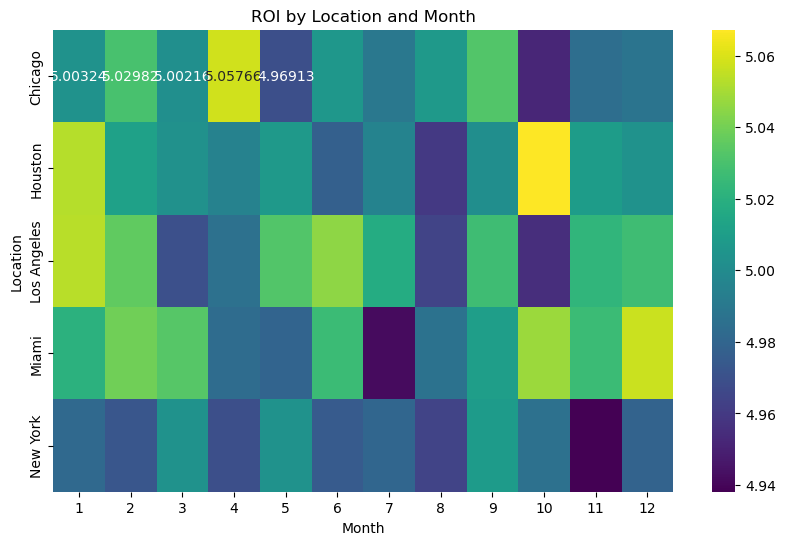

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')
plt.title('ROI by Location and Month')
plt.show()

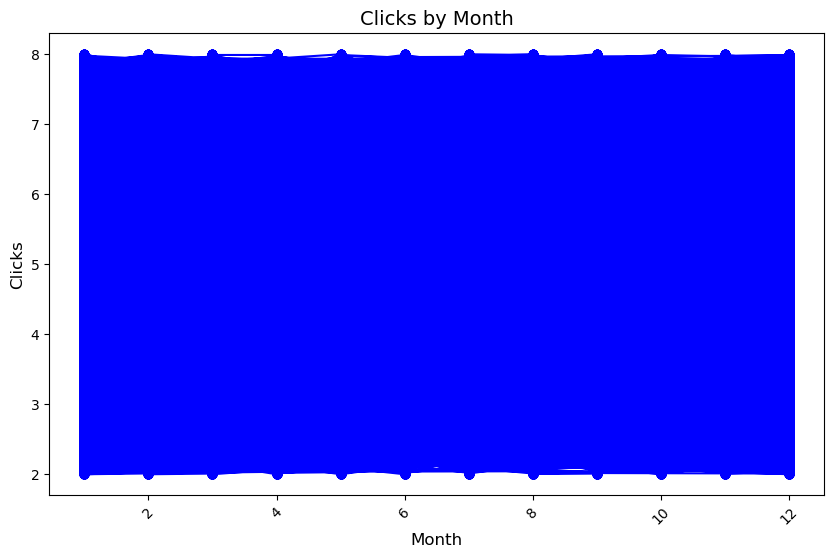

In [138]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(df['Month'], df['ROI'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Clicks by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Clicks', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot

plt.show()